In [ ]:
#https://data.cityofchicago.org/resource/s6ha-ppgi.json

In [1]:
import numpy as np
import pandas as pd
import requests
from sklearn.impute import SimpleImputer
import seaborn.objects as so

In [2]:
url = 'https://data.cityofchicago.org/resource/s6ha-ppgi.json'

In [3]:
# make get request for city of chicago salary data and check response
r = requests.get(url)
r

<Response [200]>

In [21]:
json = r.json()

In [22]:
# save json content to dataframe
affordable_housing_chi = pd.DataFrame(json)

In [23]:
affordable_housing_chi.head(10)

,community_area,community_area_number,property_type,property_name,address,zip_code,phone_number,management_company,units,x_coordinate,y_coordinate,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_43wa_7qmu,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i
0,East Garfield Park,27,Multifamily,Liberty Square Apts.,705-23 S. Independence Ave.,60624,773-538-3800,Bonheur Realty Services Corp.,66,1151407.461,1896705.24,41.87244138,-87.71958599,"{'latitude': '41.8724413775792', 'longitude': ...",36,14,28,21572,704
1,North Lawndale,29,Multifamily,Renaissance Place Apts.,3128 W. Douglas Blvd.,60623,773-762-3389,Lawndale Christian Residential Svcs.,11,1155600.26,1893326.92,41.86308761,-87.70428319,"{'latitude': '41.8630876114313', 'longitude': ...",36,14,30,21569,132
2,Humboldt Park,23,Multifamily,Rosa Parks Apts.,532 N. Trumbull Ave.,60624,773-227-6332,Bickerdike Apts.,15,1153240.184,1903567.266,41.89123533,-87.71267502,"{'latitude': '41.8912353311207', 'longitude': ...",41,46,24,21572,584
3,Garfield Ridge,56,Senior,Midway Pointe Senior Living,5011 W. 47th St.,60638,872-302-4010,Perlmark Realty Management LLC,85,1143675.613,1872964.362,41.80744124,-87.74856678,"{'latitude': '41.8074412434739', 'longitude': ...",35,28,53,22268,605
4,Uptown,3,Supportive,Carlton Terrace,4626 N. Magnolia Ave.,60640,773-649-4639,Mercy Housing Management Group,70,1167071.996,1929651.057,41.96252489,-87.66112652,"{'latitude': '41.96252489219771', 'longitude':...",37,39,31,22616,611
5,New City,61,Multifamily,Casa Hidalgo,4600 S. Wood St.,60609,312-248-8355,The Resurrection Project,10,1165081.4,1874156.261,41.81028546,-87.67002227,"{'latitude': '41.8102854562714', 'longitude': ...",53,3,59,14924,706
6,Near West Side,28,Multifamily,Westhaven Park Phase IIA,2237 W. Maypole Ave.,60612,312-455-0009,Interstate Realty Management Co.,92,1161390.347,1900920.966,41.88380799,-87.68281702,"{'latitude': '41.8838079875001', 'longitude': ...",48,46,29,21184,37
7,Logan Square,22,Multifamily,Zapata Apts.,1955 N. St. Louis Ave.,60647,773-227-6332,Bickerdike Apartments,3,1152977.196,1913047.516,41.91725524,-87.71338923,"{'latitude': '41.9172552391374', 'longitude': ...",15,49,23,22535,387
8,West Ridge,2,ARO,"5822 North Western, LLC",5822 N. Western Ave.,60659,773-572-2755,Chicago Apartment Finders,2,1159227.225,1938700.509,41.98752226,-87.68971871,"{'latitude': '41.9875222634019', 'longitude': ...",46,24,20,4450,15
9,Uptown,3,ARO,4420 N. Sheridan Apts.,4420 N. Sheridan Road,60640,312-850-2620,Quest Chicago,1,1168764.798,1929620.837,41.96240536,-87.65490367,"{'latitude': '41.9624053580997', 'longitude': ...",37,39,31,22616,241


In [28]:
affordable_housing_chi.dtypes

community_area                 object
community_area_number          object
property_type                  object
property_name                  object
address                        object
zip_code                       object
phone_number                   object
management_company             object
units                          object
x_coordinate                   object
y_coordinate                   object
latitude                       object
longitude                      object
location                       object
:@computed_region_awaf_s7ux    object
:@computed_region_43wa_7qmu    object
:@computed_region_vrxf_vc4k    object
:@computed_region_6mkv_f3dw    object
:@computed_region_bdys_3d7i    object
dtype: object

In [31]:
# convert numeric columns to float
affordable_housing_chi_num_cols = ["units", "x_coordinate", "y_coordinate", "latitude", "longitude"]
affordable_housing_chi[affordable_housing_chi_num_cols] = affordable_housing_chi[affordable_housing_chi_num_cols].apply(pd.to_numeric, errors='coerce')
affordable_housing_chi.dtypes

community_area                  object
community_area_number           object
property_type                   object
property_name                   object
address                         object
zip_code                        object
phone_number                    object
management_company              object
units                            int64
x_coordinate                   float64
y_coordinate                   float64
latitude                       float64
longitude                      float64
location                        object
:@computed_region_awaf_s7ux     object
:@computed_region_43wa_7qmu     object
:@computed_region_vrxf_vc4k     object
:@computed_region_6mkv_f3dw     object
:@computed_region_bdys_3d7i     object
dtype: object

In [33]:
# How much data is missing? 
affordable_housing_chi.isna().sum()

community_area                 0
community_area_number          0
property_type                  0
property_name                  0
address                        0
zip_code                       0
phone_number                   0
management_company             0
units                          0
x_coordinate                   0
y_coordinate                   0
latitude                       0
longitude                      0
location                       3
:@computed_region_awaf_s7ux    5
:@computed_region_43wa_7qmu    5
:@computed_region_vrxf_vc4k    5
:@computed_region_6mkv_f3dw    5
:@computed_region_bdys_3d7i    5
dtype: int64

<Axes: >

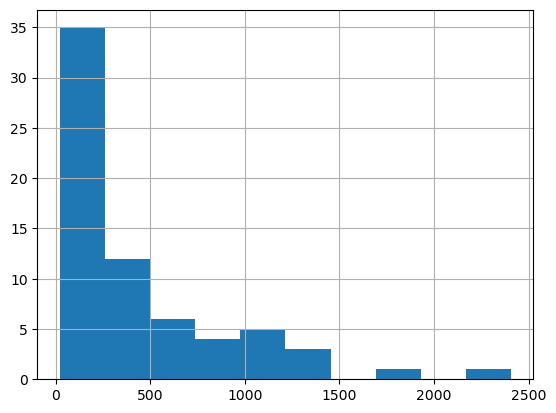

In [35]:
df2 = affordable_housing_chi.groupby('community_area')['units'].sum()
df2.hist()

In [41]:
df2.describe()

count      67.000000
mean      435.373134
std       481.481232
min        23.000000
25%       101.000000
50%       228.000000
75%       575.000000
max      2406.000000
Name: units, dtype: float64

In [42]:
df2.sort_values()

community_area
Loop                        23
Brighton Park               30
Lincoln Square              36
South Lawndale              39
Greater Grand Crossing      56
                          ... 
Near North Side           1241
Near South Side           1372
Uptown                    1407
Near West Side            1782
Grand Boulevard           2406
Name: units, Length: 67, dtype: int64